# Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data1 = data.copy()

In [5]:
corr =data1.corr()

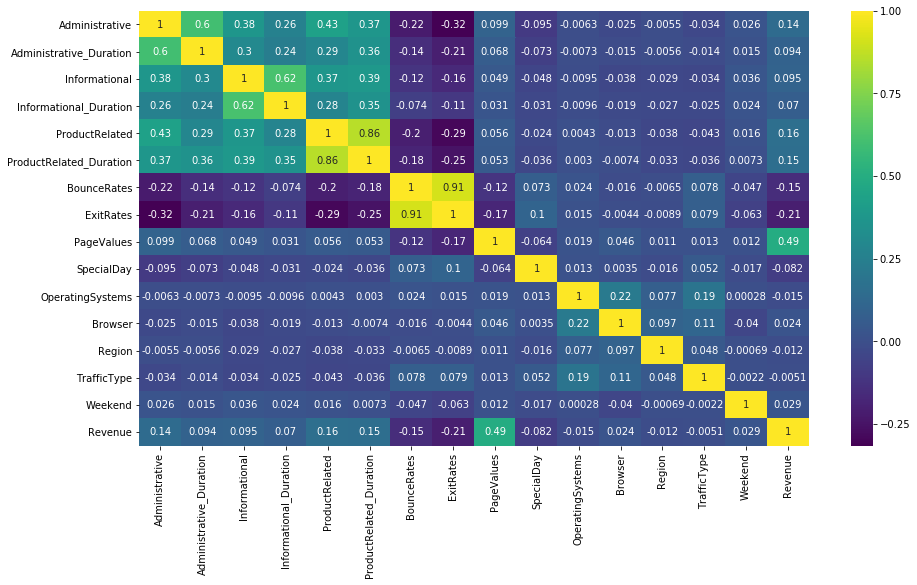

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

### we already know that the data containss multi collinearity. lets confirm it with VIF test

# Encoding the Categorical Columns to Numerical

In [7]:
data1 = data.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LB = LabelEncoder()

In [10]:
data1['Month'] = LB.fit_transform(data['Month'])
data1['VisitorType'] = LB.fit_transform(data['VisitorType'])
data1['Weekend'] = LB.fit_transform(data['Weekend'])
data1['Revenue'] = LB.fit_transform(data['Revenue'])

In [11]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


# Checking Multicollinearity using VIF Test

### Variance Inflation Factor
     VIF Value = 1       : No Correlation
     VIF Value < 5       : Moderate
     VIF Value > 5, < 10 : High
     VIF Value > 10      : Very High   should drop the variable

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
X = data1.drop('Revenue',axis=1)
Y = data1.Revenue

In [14]:
for i in range(0,len(data1.columns)):
    print(data1.columns[i] ,'\t', variance_inflation_factor(data1.values,i))

Administrative 	 2.8405023275906145
Administrative_Duration 	 2.043703893752212
Informational 	 2.1205823410095275
Informational_Duration 	 1.7794537033257225
ProductRelated 	 6.674558888659066
ProductRelated_Duration 	 6.020368321130629
BounceRates 	 7.365538189027982
ExitRates 	 11.784523090661162
PageValues 	 1.4753643745404985
SpecialDay 	 1.135250265596879
Month 	 4.701794670705244
OperatingSystems 	 5.843450595419322
Browser 	 2.9942258067594723
Region 	 2.5865271824382936
TrafficType 	 2.125579913470816
VisitorType 	 6.233774689557866
Weekend 	 1.2898422819409094
Revenue 	 1.6285028987722723


Since all the variables are under the values 10 there is no need for dropping them 
lets try feature engineering to reduce the multicollinearity

# Feature Engineering

In [16]:
newdata = data1.copy()

In [17]:
newdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


# lets get the mean of two multicollinearity features and omit them

In [19]:
newdata['admn'] = (data1['Administrative']+ data1['Administrative_Duration']) / 2
newdata['info'] = (data1['Informational']+ data1['Informational_Duration']) / 2
newdata['prod'] = (data1['ProductRelated']+ data1['ProductRelated_Duration']) / 2
newdata['bunce'] = (data1['BounceRates']+ data1['ExitRates']) / 2
newdata['os']   = (data1['OperatingSystems']+data1['Browser']) / 2

In [20]:
newdata.drop(['Administrative','Administrative_Duration','Informational',
             'Informational_Duration','ProductRelated','ProductRelated_Duration',
              'BounceRates','ExitRates','OperatingSystems','Browser'],axis=1 ,inplace=True)

## Logistic Regression

In [21]:
X = newdata.drop('Revenue',axis=1)
Y = newdata.Revenue

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

###  K Fold Cross Validation

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [24]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.49 ROC-AOC: 0.67


# Random Forest

In [26]:
RT = RandomForestClassifier(random_state=0)

In [27]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.60 ROC-AOC: 0.74


### Inference:
            From both the models Random Forest has given better scores
            The F1 Score is far better in random forest when compared to Logistic

# lets add the two multicollinearity features and omit them

In [28]:
newdata = data1.copy()

In [29]:
newdata['admn'] = (data1['Administrative']+ data1['Administrative_Duration']) 
newdata['info'] = (data1['Informational']+ data1['Informational_Duration']) 
newdata['prod'] = (data1['ProductRelated']+ data1['ProductRelated_Duration']) 
newdata['bunce'] = (data1['BounceRates']+ data1['ExitRates']) 
newdata['os']   = (data1['OperatingSystems']+data1['Browser']) 

In [30]:
newdata.drop(['Administrative','Administrative_Duration','Informational',
             'Informational_Duration','ProductRelated','ProductRelated_Duration',
              'BounceRates','ExitRates','OperatingSystems','Browser'],axis=1 ,inplace=True)

## Logistic Regression

In [31]:
X = newdata.drop('Revenue',axis=1)
Y = newdata.Revenue

In [32]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [33]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [34]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.50 ROC-AOC: 0.67


# Random Forest

In [35]:
RT = RandomForestClassifier(random_state=0)

In [36]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.60 ROC-AOC: 0.74


### Inference:
           There is no significance difference between mean and adding the multi collinearity variables
           Both the engineering techniques didnt show much variation with the normal transformation models